In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid', palette='husl')
import time 
from datetime import datetime

In [3]:
consumerKey = 'hnuzMJ1QGE3TcjlYiXohfA6vkGb55OT9xKtTCcd31L4'

In [6]:
url_summary = 'https://api-tokyochallenge.odpt.org/api/v4/files/Agoop/data/Summary.csv?acl:consumerKey={}'
df_summary = pd.read_csv(url_summary.format(consumerKey))

In [7]:
df_summary

,date,dayofweek,dailyid_count,log_count
0,2018/10/01,MON,37382,2164347
1,2018/10/02,TUE,38807,2235014
2,2018/10/03,WED,38934,2260240
3,2018/10/04,THU,38730,2253780
4,2018/10/05,FRI,39288,2414898
...,...,...,...,...
360,2019/09/26,THU,56539,3283266
361,2019/09/27,FRI,56803,3360115
362,2019/09/28,SAT,48571,2918971
363,2019/09/29,SUN,44924,2621201


## Information About the Dataset
**Source**: [Tokyo Public Transportation Open Data Challenge](https://tokyochallenge.odpt.org)

**Dataset**: [Floating Populattion Data (Point type) of AGOOP Corp.](https://ckan-tokyochallenge.odpt.org/dataset/o_fpd_point-agoop)

<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>dailyid</td>
    <td>Unique ID for each user. Renewed at 0 a.m. everyday</td>
  </tr>
  <tr>
    <td>year</td>
    <td>year</td>
  </tr>
  <tr>
    <td>month</td>
    <td>month</td>
  </tr>
  <tr>
    <td>day</td>
    <td>day</td>
  </tr>
  <tr>
    <td>dayofweek</td>
    <td>1: Mon, 2: Tue, 3: Wed, 4: Thur, 5: Fri, 6: Sat, 7: Sun</td>
  </tr>
  <tr>
    <td>hour</td>
    <td>hour</td>
  </tr>
  <tr>
    <td>minute</td>
    <td>minute</td>
  </tr>
  <tr>
    <td>latitude</td>
    <td>latitude</td>
  </tr>
  <tr>
    <td>longitude</td>
    <td>longitude</td>
  </tr>
  <tr>
    <td>OS</td>
    <td>Andriod / iOS</td>
  </tr>
  <tr>
    <td><b>home_countryname</b></td>
    <td>Country of origin estimated from location data</td>
  </tr>
  <tr>
    <td>plmn</td>
    <td>Information about the phone carrier of the SIM card</td>
  </tr>
  <tr>
    <td>plmn_countryname</td>
    <td>Carrier country</td>
  </tr>
  <tr>
    <td><b>setting_currency</b></td>
    <td>currency settings</td>
  </tr>
  <tr>
    <td>setting_language</td>
    <td>language settings</td>
  </tr>
  <tr>
    <td>setting_country</td>
    <td>country settings</td>
  </tr>
  <tr>
    <td>logtype_category</td>
    <td>foreground, background, other</td>
  </tr>
  <tr>
    <td>logtype_subcategory</td>
    <td>move(iOS), arrival(iOS), departure(iOS), timer(Android only)</td>
  </tr>
  <tr>
    <td>accuracy</td>
    <td>GPS accuracy</td>
  </tr>
  <tr>
    <td>speed</td>
    <td>speed in m/sec obtained from phone sensor or Agoop's original algorithm</td>
  </tr>
  <tr>
    <td>estimated_speed_flag</td>
    <td>Whether speed info was obtained using sensor or Agoop's algorithm</td>
  </tr>
  <tr>
    <td>course</td>
    <td>Move direction. 0 degrees North</td>
  </tr>
  <tr>
    <td>estimated_course_flag</td>
    <td>Whether estimated course was obtained using sensor or Agoop's algorithm</td>
  </tr>
  <tr>
    <td>prefcode</td>
    <td>Code indicating which prefecture the log was obtained from</td>
  </tr>
  <tr>
    <td><b>citycode</b></td>
    <td>Code indicating</td>
  </tr>
  <tr>
    <td>mesh100mid</td>
    <td>ID for mesh data(also availble)</td>
  </tr>
  <tr>
    <td>home_prefcode</td>
    <td>Estimated home location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>home_citycode</b></td>
    <td>Estimated home location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td>workplace_prefcode</td>
    <td>Estimated workplace location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td>workplace_citycode</td>
    <td>Estimated workplace location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>transportation_type</b></td>
    <td>Estimated transportation type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>gender</b></td>
    <td>gender of the user</td>
  </tr>
    
</table>

</body>
</html>

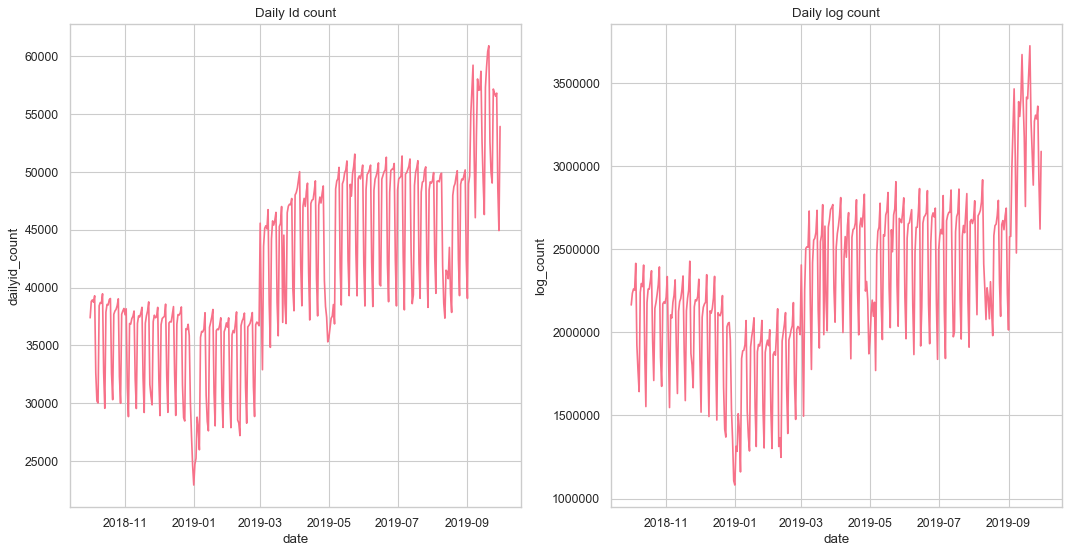

In [8]:
df_summary.date = [datetime.strptime(_d, '%Y/%m/%d') for _d in df_summary.date]
plt.figure(figsize=(16,8), dpi=80)
plt.subplot(121)
sns.lineplot(x='date', y='dailyid_count', 
             data=df_summary,
             estimator=None
            )
plt.title('Daily Id count')
plt.subplot(122)
sns.lineplot(x='date', y='log_count', 
             data=df_summary,
             estimator=None
            )
plt.title('Daily log count')
plt.show()

In [9]:
citymaster_url = "https://api-tokyochallenge.odpt.org/api/v4/files/Agoop/data/prefcode_citycode_master_UTF-8.csv?acl:consumerKey={}"
df_citycode = pd.read_csv(citymaster_url.format(consumerKey))

tokyo_32_dict = dict(df_citycode[df_citycode.prefname=='東京都'].loc[:,['cityname', 'citycode']].values[:32])

In [10]:
tokyo_32_dict

{'千代田区': 13101,
 '中央区': 13102,
 '港区': 13103,
 '新宿区': 13104,
 '文京区': 13105,
 '台東区': 13106,
 '墨田区': 13107,
 '江東区': 13108,
 '品川区': 13109,
 '目黒区': 13110,
 '大田区': 13111,
 '世田谷区': 13112,
 '渋谷区': 13113,
 '中野区': 13114,
 '杉並区': 13115,
 '豊島区': 13116,
 '北区': 13117,
 '荒川区': 13118,
 '板橋区': 13119,
 '練馬区': 13120,
 '足立区': 13121,
 '葛飾区': 13122,
 '江戸川区': 13123,
 '八王子市': 13201,
 '立川市': 13202,
 '武蔵野市': 13203,
 '三鷹市': 13204,
 '青梅市': 13205,
 '府中市': 13206,
 '昭島市': 13207,
 '調布市': 13208,
 '町田市': 13209}

## Initial Analysis
The entire dataset was too large to store in memory, so I reduced it. (Refer to get_data.py for scraping code). It took a few hours to reduce for a little more than a month's worth of data.

**Range**: `2019/06/01 10:00` to `2019/07/13 23:00`

**Location**: 
* `23 Districts`: Chiyoda, Chuo, Minato, Shinjuku, Bunkyo, Daito, Sumida, Koutou, Shinagawa, Meguro, Oota, Setagaya, Shibuya, Nakano, Suginami, Toshima, Kita, Arakawa, Itabashi, Nerima, Adachi, Katsushika, Edogawa
* `9 Cities`: Hachioji, Tachikawa, Musashino, Mitaka, Ome, Fuchu, Akishima, Chofu, Machida

**Value**: Number of `unique ID counts for each area per hour`.

**Size**: Long Format: `16476x3`, Wide Format: `32x518`

In [13]:
float_pop = pd.read_csv('./floating_population.csv')
float_pop = float_pop.iloc[:,1:] 
float_pop['datetime'] = pd.to_datetime(float_pop['datetime'])

In [14]:
float_pop.head()

,citycode,dailyid,datetime
0,13101.0,1039,2019-06-01 10:00:00
1,13102.0,711,2019-06-01 10:00:00
2,13103.0,1031,2019-06-01 10:00:00
3,13104.0,920,2019-06-01 10:00:00
4,13105.0,365,2019-06-01 10:00:00


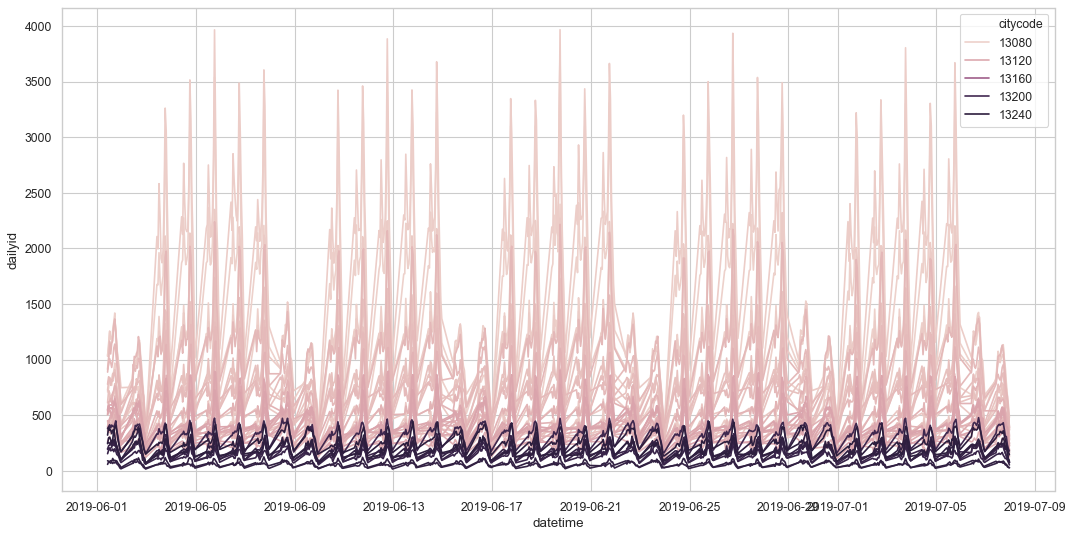

In [23]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', hue='citycode', data=float_pop)
plt.show()

### Analysis for One District (Chiyoda ward)

**Background Info**
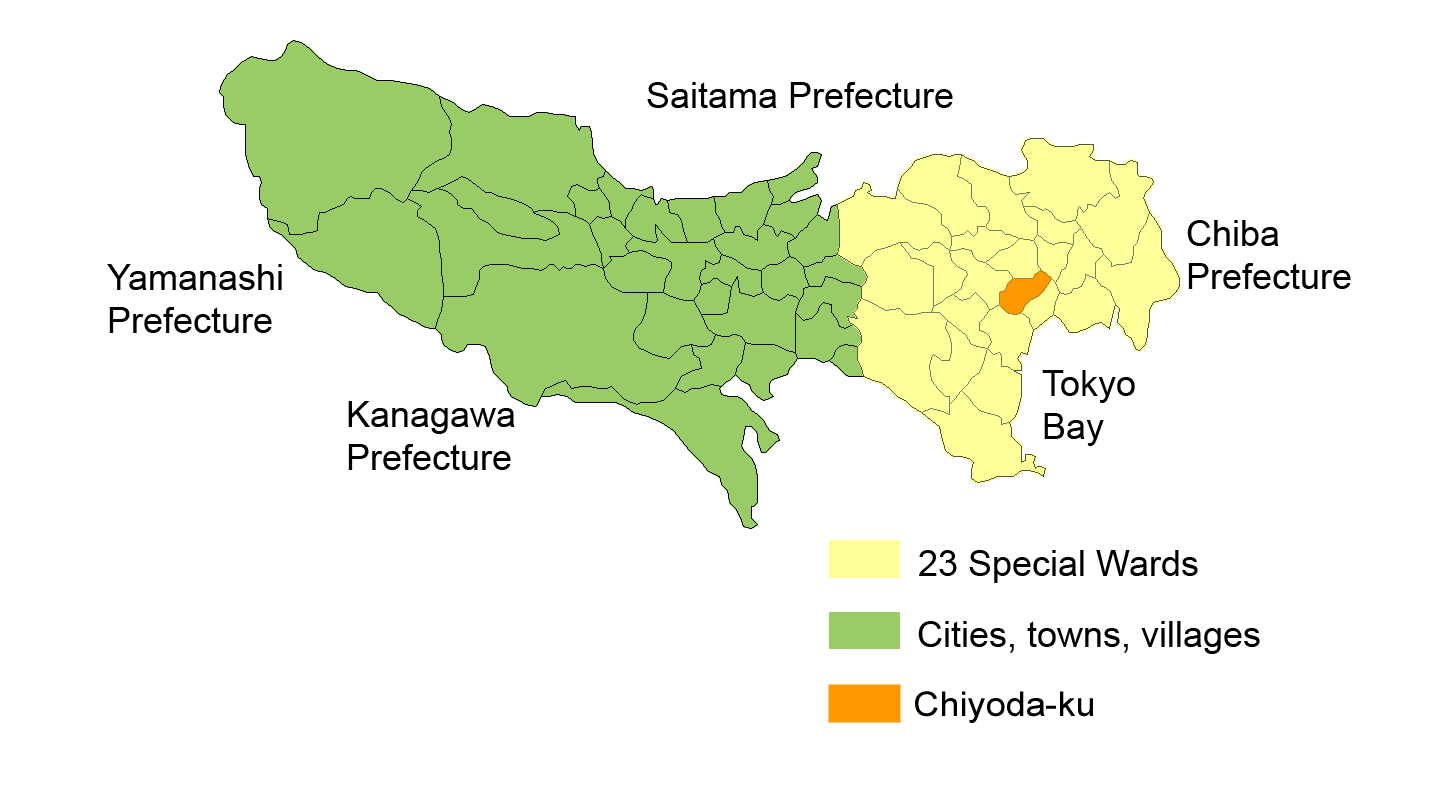
* "Political Center" of Japan. The Imperial Palace, National Diet(Like the congress building in Washington DC), Minister's Official Residence, Supreme Court, ministries, and agencies are located within Chiyoda Ward.


* The least populated among the 23 special wards. It is a "workplace" where people commute to but do not live, just like the financial district in San Francisco.

In [15]:
chiyoda = (float_pop
         .set_index('citycode')
         .loc[13101.0,:]
)

In [16]:
chiyoda

,dailyid,datetime
citycode,,
13101.0,1039,2019-06-01 10:00:00
13101.0,1113,2019-06-01 11:00:00
13101.0,1245,2019-06-01 12:00:00
13101.0,1183,2019-06-01 13:00:00
13101.0,1178,2019-06-01 14:00:00
...,...,...
13101.0,867,2019-07-07 19:00:00
13101.0,730,2019-07-07 20:00:00
13101.0,579,2019-07-07 21:00:00


### Weekly Trends

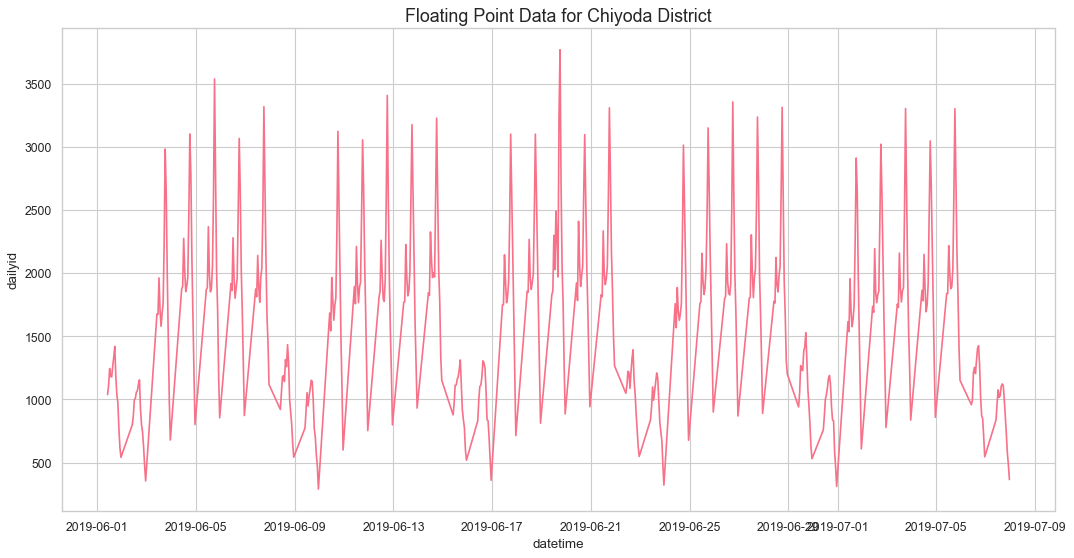

In [22]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', data=chiyoda)
ax.set_title('Floating Point Data for Chiyoda District', size=16)
plt.show()

**Observations**: We can clearly see a weekly cycle. The higher peaks correspond to weekdays and the lower peaks correpond to weekends.

In [29]:
mask = (chiyoda['datetime'] > '2019-06-10') & (chiyoda['datetime'] < '2019-06-17')
chiyoda_subset = chiyoda.loc[mask]

### Daily Trends

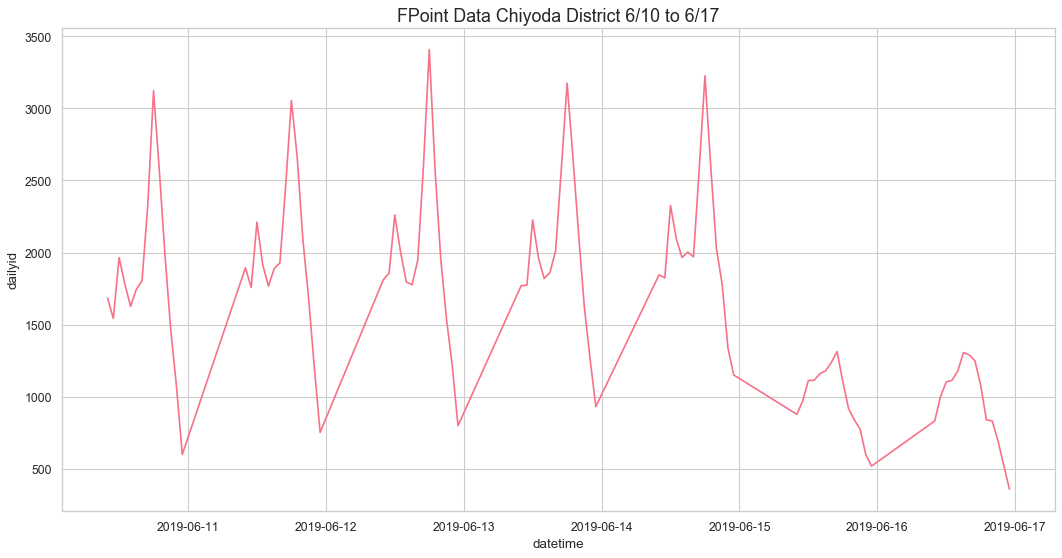

In [30]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', data=chiyoda_subset)
ax.set_title('FPoint Data Chiyoda District 6/10 to 6/17', size=16)
plt.show()

**Observation**: There are two peaks each day: one small, one large. Why? 

## Problems

1. There are gaps in the data. There is only data from `10:00` to `23:59` everyday. There is no data from `0:00` to `9:59`. How to deal with this gap? Also, this means we don't have the data for the rush hours.


2. Currently the 2D autocorrelation transform function isn't compatible with `32x512`. Need to rewrite it so that it can be used for non-squared matrices.


3. Too simple? Maybe we can pull more variables from the original dataset?